# Librerías

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Constantes

In [271]:
FICHERO_DATOS = './data/datos_laguna_unificados.csv'

COLORES = ["cornflowerblue", "mediumpurple", "indianred", "mediumseagreen"]

# Métodos

In [272]:
def pintar_datos(data):
    # Convierte la columna 'date' a tipo datetime
    data['date'] = pd.to_datetime(data['date'])

    # Configuración del gráfico
    plt.figure(figsize=(15, 5))
    plt.title('Comparación de Temperaturas (Fondo, Superficie y Ambiente) en el Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Temperatura (°C)')

    # Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'
    plt.scatter(data['date'], data['fondo'], label='Fondo', alpha=1, color = COLORES[0], s = 1.5)
    plt.scatter(data['date'], data['superficie'], label='Superficie', alpha=1, color = COLORES[1], s = 1.5)
    plt.scatter(data['date'], data['ambiente'], label='Ambiente', alpha=1, color = COLORES[2], s = 1.5)
    plt.scatter(data['date'], data['nivel'], label='Nivel', alpha=1, color = COLORES[3], s = 1.5)

    # Mostrar una leyenda en la parte superior izquierda
    plt.legend(loc='upper left')

    # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.grid(True)
    plt.show()

def pintar_datos_finales(data):
    # Configuración del gráfico
    plt.figure(figsize=(15, 5))
    plt.title('Comparación de Temperaturas (Fondo, Superficie y Ambiente) en el Tiempo')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Temperatura (°C)')

    # Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'
    plt.scatter(data.index, data['agua'], label='Fondo', alpha=1, color = COLORES[0], s = 1.5)
    # plt.scatter(data.index, data['ambiente'], label='Ambiente', alpha=1, color = COLORES[2], s = 1.5)
    # plt.scatter(data.index, data['nivel'], label='Nivel', alpha=1, color = COLORES[3], s = 1.5)

    # Mostrar una leyenda en la parte superior izquierda
    plt.legend(loc='upper left')

    # Rotar las etiquetas del eje x para una mejor legibilidad
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Carga de datos

In [273]:
data = pd.read_csv(FICHERO_DATOS)

data['date'] = pd.to_datetime(data['date'])  
data = data.sort_values(by='date')

# Reiniciar los índices después de ordenar
data = data.reset_index(drop=True)

In [274]:
data

,date,fondo,superficie,ambiente,nivel
0,2022-09-26 02:00:00,NaN,NaN,20.474,40.3
1,2022-09-26 08:00:00,NaN,NaN,22.608,NaN
2,2022-09-26 14:00:00,NaN,NaN,24.422,NaN
3,2022-09-26 20:00:00,NaN,NaN,18.580,NaN
4,2022-09-27 02:00:00,NaN,NaN,NaN,43.5
...,...,...,...,...,...
6911,2023-09-14 06:00:00,28.985,28.740,24.490,34.0
6912,2023-09-14 07:00:00,28.875,28.650,25.060,41.0
6913,2023-09-14 08:00:00,28.795,28.575,25.330,34.0
6914,2023-09-14 09:00:00,28.750,28.520,26.130,33.0


# Eliminar Outliers

In [275]:
# Calcular Q1 y Q3
Q1 = data['ambiente'].quantile(0.25)
Q3 = data['ambiente'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
# Reemplazar outliers con NaN
# data['ambiente'] = data['ambiente'].where((data['ambiente'] >= lower_bound) & (data['ambiente'] <= upper_bound), np.nan)
data['ambiente'] = data['ambiente'].where((data['ambiente'] >= lower_bound) & (data['ambiente'] <= upper_bound), np.nan)


In [276]:
Q1 = data['nivel'].quantile(0.25)
Q3 = data['nivel'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
# Reemplazar outliers con NaN
# data['nivel'] = data['nivel'].where((data['nivel'] > 0), np.nan)
# data['nivel'] = data['nivel'].where((data['nivel'] >= lower_bound) & (data['nivel'] <= upper_bound), np.nan)
data['nivel'] = data['nivel'].where((data['nivel'] > 26), np.nan)

In [277]:
Q1 = data['superficie'].quantile(0.25)
Q3 = data['superficie'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers
# Reemplazar outliers con NaN
data['superficie'] = data['superficie'].where((data['superficie'] > 5), np.nan)
print(data)

                    date   fondo  superficie  ambiente  nivel
0    2022-09-26 02:00:00     NaN         NaN    20.474   40.3
1    2022-09-26 08:00:00     NaN         NaN    22.608    NaN
2    2022-09-26 14:00:00     NaN         NaN    24.422    NaN
3    2022-09-26 20:00:00     NaN         NaN    18.580    NaN
4    2022-09-27 02:00:00     NaN         NaN       NaN   43.5
...                  ...     ...         ...       ...    ...
6911 2023-09-14 06:00:00  28.985      28.740    24.490   34.0
6912 2023-09-14 07:00:00  28.875      28.650    25.060   41.0
6913 2023-09-14 08:00:00  28.795      28.575    25.330   34.0
6914 2023-09-14 09:00:00  28.750      28.520    26.130   33.0
6915 2023-09-14 10:00:00  28.780      28.540    26.450    NaN

[6916 rows x 5 columns]


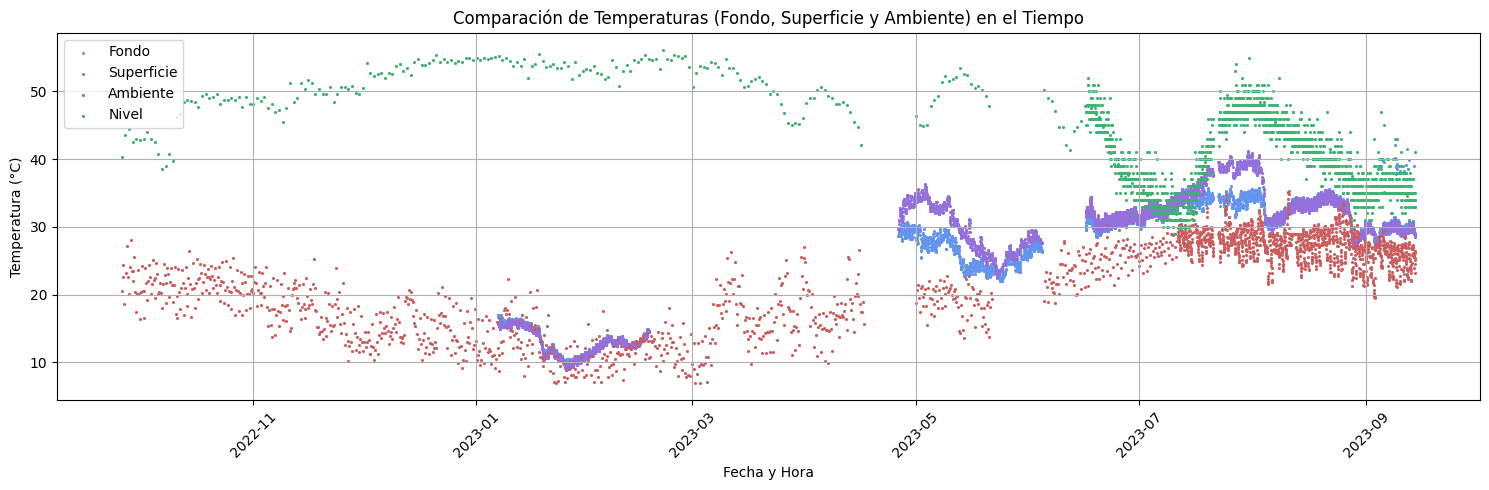

In [278]:
pintar_datos(data)

In [279]:
# Convierte la columna 'date' a tipo datetime
data['date'] = pd.to_datetime(data['date'])

C:\Users\Vir\AppData\Local\Temp\ipykernel_10980\2732442486.py:32: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


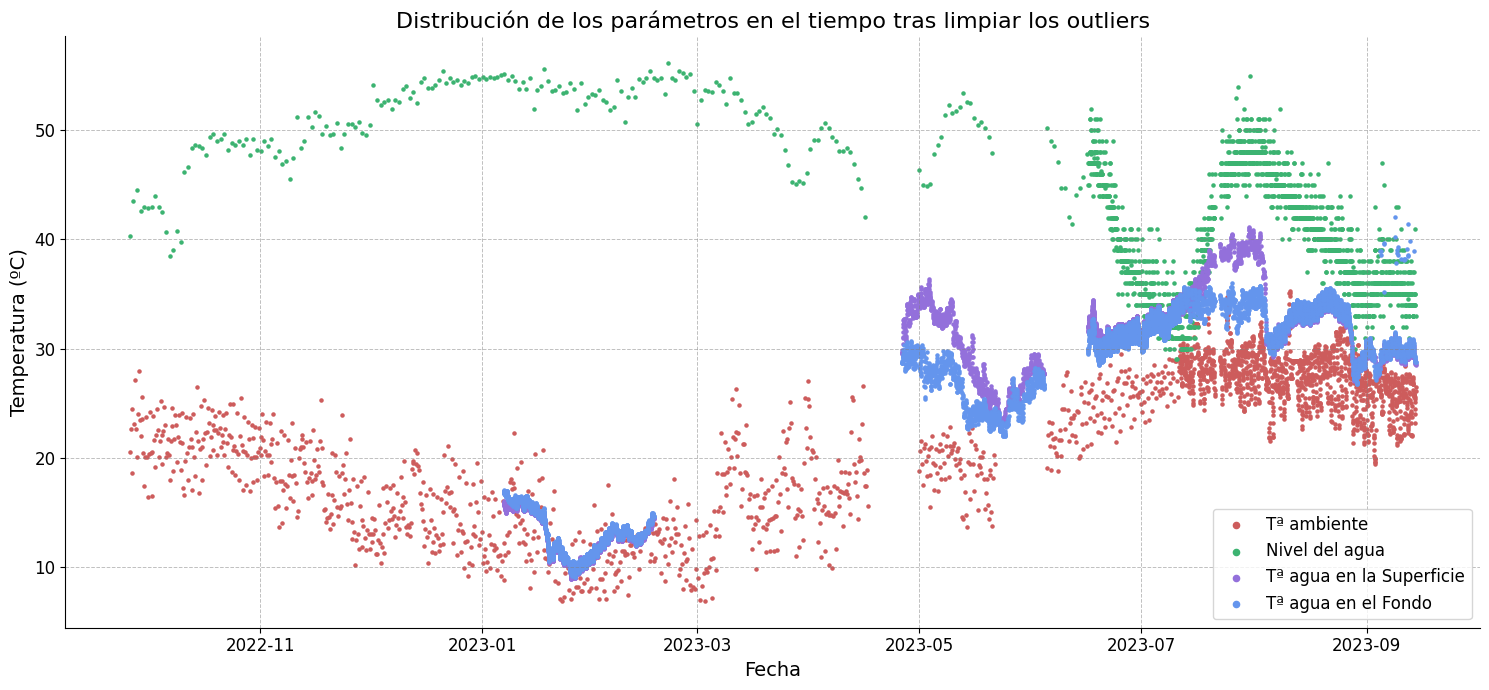

In [280]:


# Configuración del gráfico
plt.figure(figsize=(15,7))
# Configuración de los ejes y títulos
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.title(f'Distribución de los parámetros en el tiempo tras limpiar los outliers', fontsize=16)

# Quitar los bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Configurar la cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha = 0.5)


# Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'
plt.scatter(data['date'], data['ambiente'], label='Tª ambiente', marker='o', alpha=1, color = COLORES[2], s=5)
plt.scatter(data['date'], data['nivel'], label='Nivel del agua', marker='o', alpha=1, color = COLORES[3], s=5)

plt.scatter(data['date'], data['superficie'], label='Tª agua en la Superficie', marker='o', alpha=1, color = COLORES[1], s=5)
plt.scatter(data['date'], data['fondo'], label='Tª agua en el Fondo', marker='o', alpha=1, color = COLORES[0], s=5)

# # Mostrar una leyenda en la parte superior izquierda
# plt.legend(loc='upper left')
# Ajustar el tamaño de la leyenda
plt.legend(fontsize=12)
legend = ax.legend(fontsize=12)
for handle in legend.legendHandles:
    handle._sizes = [20]  # Ajusta el tamaño de los marcadores en la leyenda





# Mostrar el gráfico
plt.tight_layout()
# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"datos_limpios.png", dpi=300, bbox_inches='tight')
plt.show()

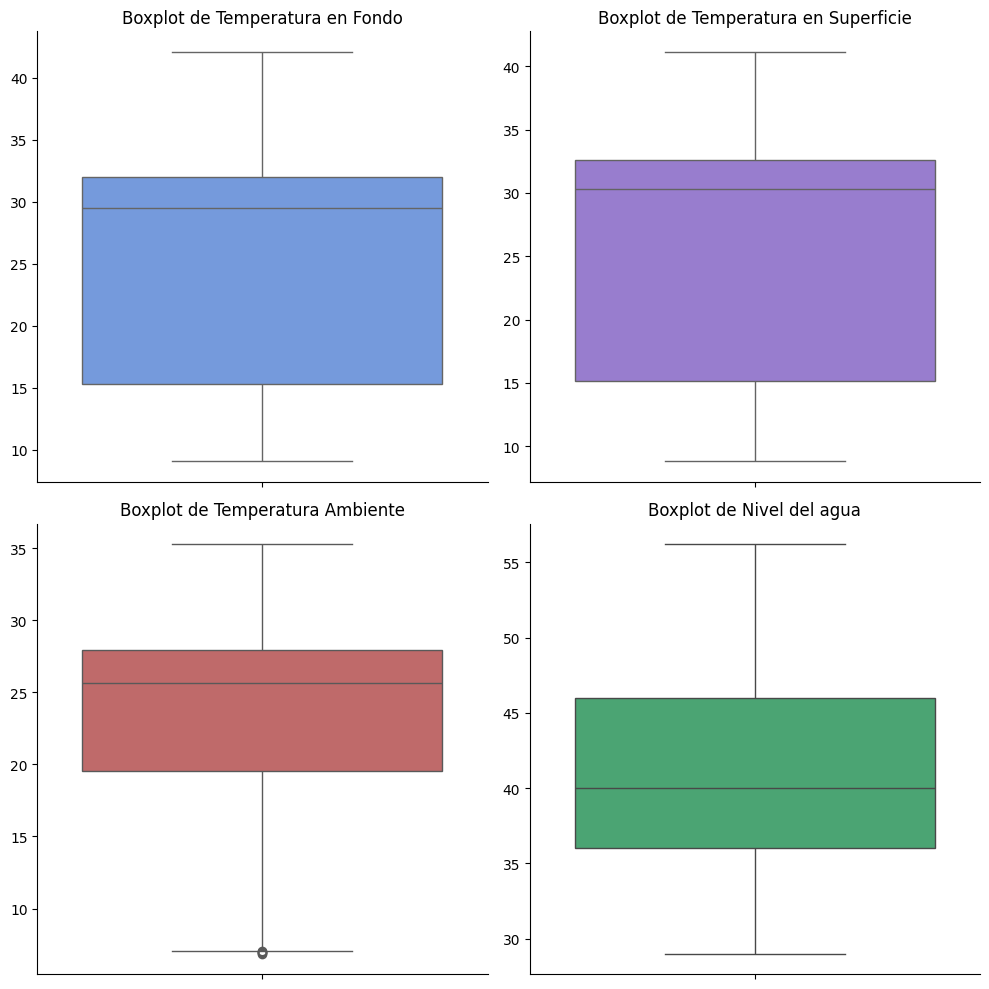

In [281]:

# Boxplot de las temperaturas en fondo, superficie y ambiente
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)

ax1 = sns.boxplot(data=data, y='fondo', color = COLORES[0])
plt.title('Boxplot de Temperatura en Fondo')
ax1.spines['top'].set_visible(False)  
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('')  
ax1.set_xlabel('')  

plt.subplot(2, 2, 2)
ax2 = sns.boxplot(data=data, y='superficie', color = COLORES[1])
plt.title('Boxplot de Temperatura en Superficie')
ax2.spines['top'].set_visible(False)  
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('')  
ax2.set_xlabel('')  

plt.subplot(2, 2, 3)
ax3 = sns.boxplot(data=data, y='ambiente', color = COLORES[2])
plt.title('Boxplot de Temperatura Ambiente')
ax3.spines['top'].set_visible(False)  
ax3.spines['right'].set_visible(False)
ax3.set_ylabel('')  
ax2.set_xlabel('')  

plt.subplot(2, 2, 4)
ax4 = sns.boxplot(data=data, y='nivel', color = COLORES[3])
plt.title('Boxplot de Nivel del agua')
ax4.spines['top'].set_visible(False)  
ax4.spines['right'].set_visible(False)
ax4.set_ylabel('')  
ax4.set_xlabel('')  

plt.tight_layout()
plt.show()

# Reduccir dataset

In [282]:
data = data[data['date'] >= '2023-06-17'].reset_index(drop=True)

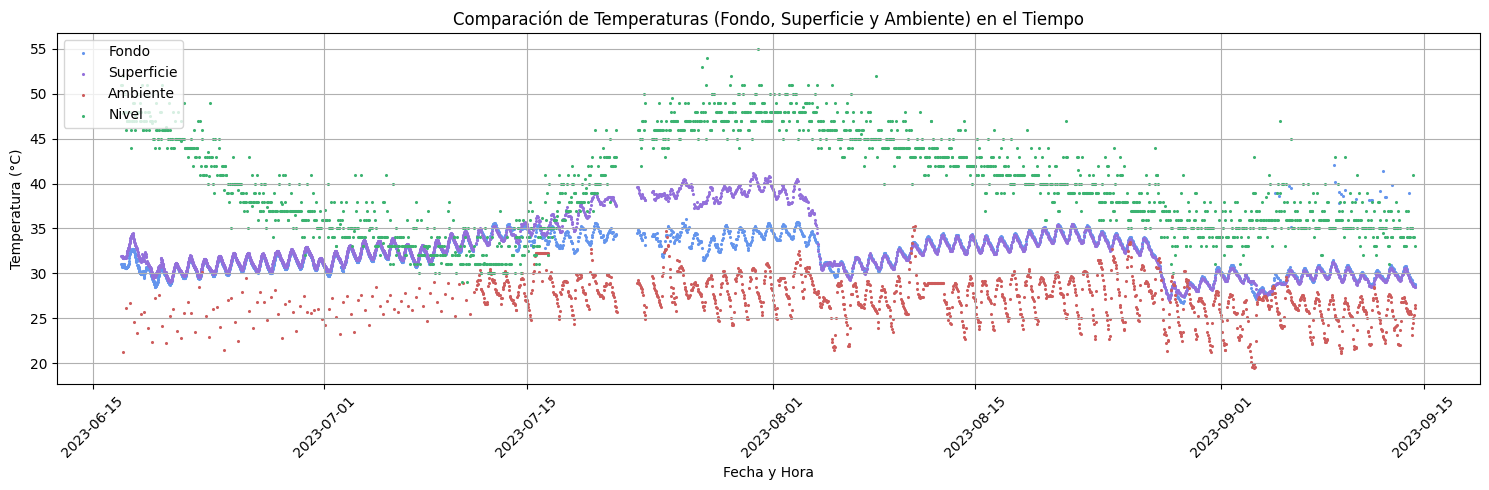

In [283]:
pintar_datos(data)

C:\Users\Vir\AppData\Local\Temp\ipykernel_10980\2525640367.py:32: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


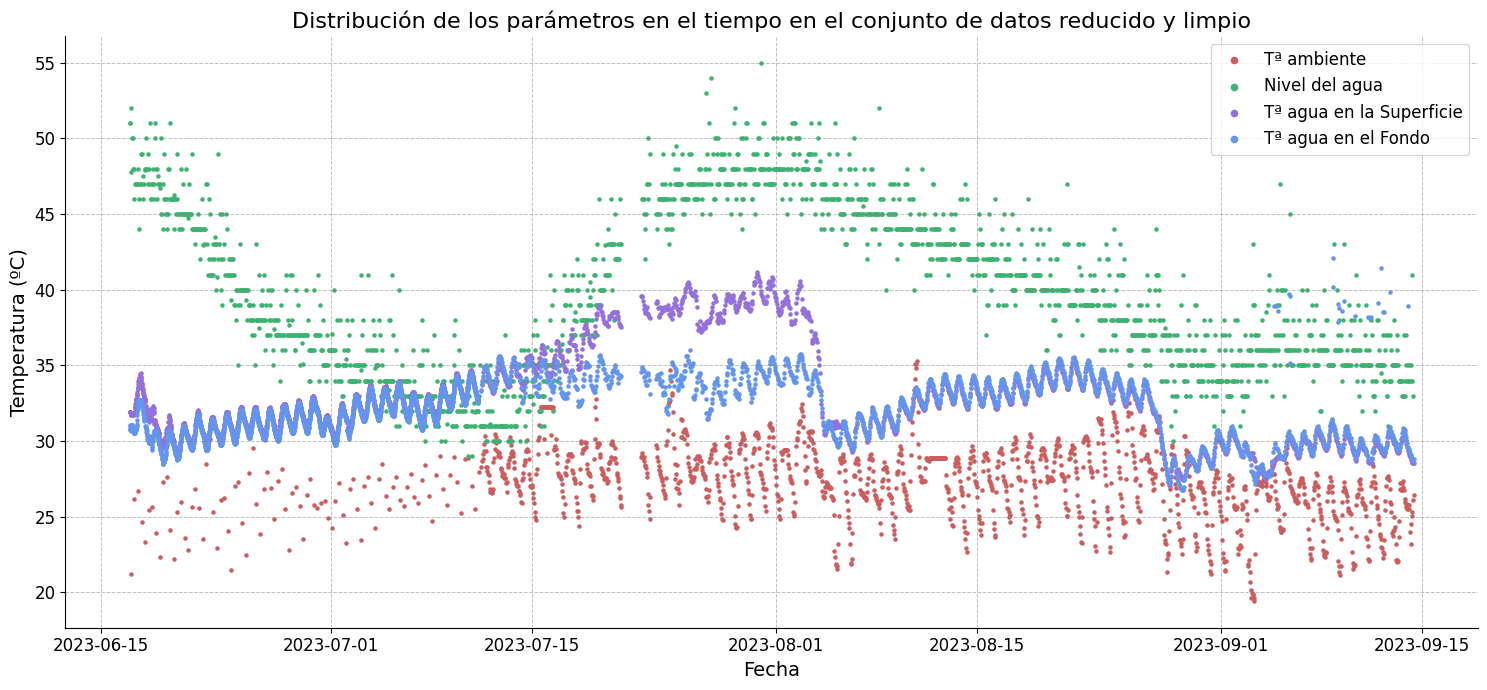

In [284]:


# Configuración del gráfico
plt.figure(figsize=(15,7))
# Configuración de los ejes y títulos
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.title(f'Distribución de los parámetros en el tiempo en el conjunto de datos reducido y limpio', fontsize=16)

# Quitar los bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Configurar la cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha = 0.5)


# Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'
plt.scatter(data['date'], data['ambiente'], label='Tª ambiente', marker='o', alpha=1, color = COLORES[2], s=5)
plt.scatter(data['date'], data['nivel'], label='Nivel del agua', marker='o', alpha=1, color = COLORES[3], s=5)

plt.scatter(data['date'], data['superficie'], label='Tª agua en la Superficie', marker='o', alpha=1, color = COLORES[1], s=5)
plt.scatter(data['date'], data['fondo'], label='Tª agua en el Fondo', marker='o', alpha=1, color = COLORES[0], s=5)

# # Mostrar una leyenda en la parte superior izquierda
# plt.legend(loc='upper left')
# Ajustar el tamaño de la leyenda
plt.legend(fontsize=12)
legend = ax.legend(fontsize=12)
for handle in legend.legendHandles:
    handle._sizes = [20]  # Ajusta el tamaño de los marcadores en la leyenda





# Mostrar el gráfico
plt.tight_layout()
# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"datos_reducido.png", dpi=300, bbox_inches='tight')
plt.show()

In [285]:
limpia_datos = data["fondo"].copy()

for n in range(1,len(limpia_datos)):
    if (limpia_datos[n] > limpia_datos[n-1]+2):
        limpia_datos[n]=limpia_datos[n-1]

data['fondo'] = limpia_datos

data = data.iloc[:]

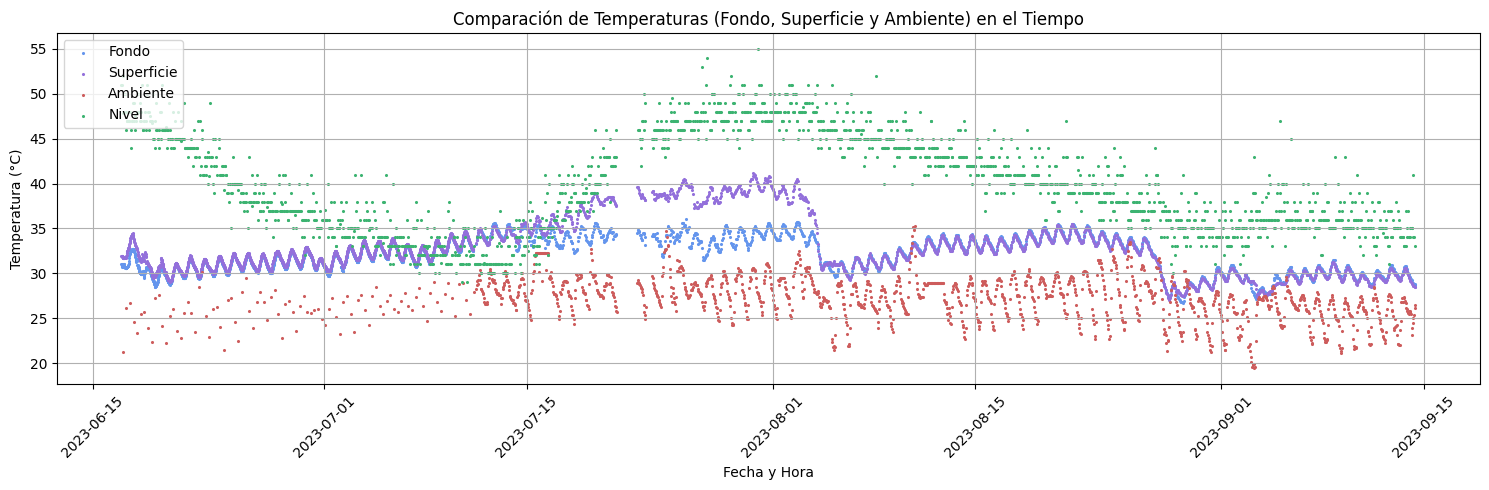

In [286]:
pintar_datos(data)

In [287]:
data['agua'] = data[['fondo', 'superficie']].mean(axis=1)

data = data.drop(columns=['fondo', 'superficie'], axis=1)

data.set_index('date', inplace=True)

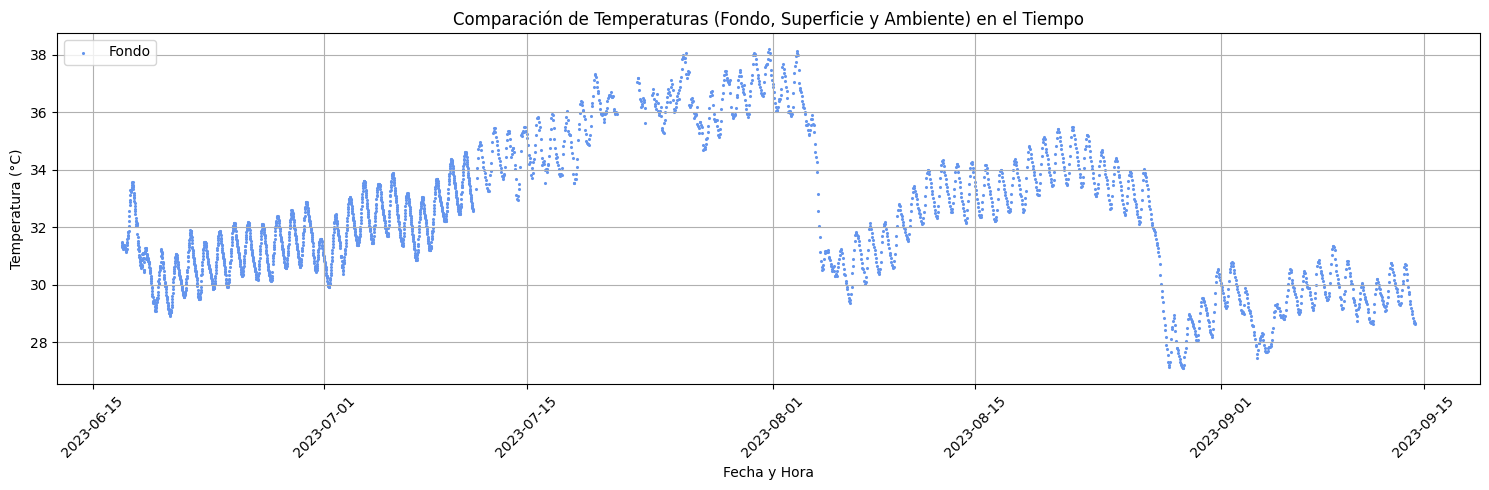

In [288]:
pintar_datos_finales(data)

# Establecer frecuencia horaria

In [289]:
data = data.resample("h").mean()

In [290]:
data

,ambiente,nivel,agua
date,,,
2023-06-17 00:00:00,NaN,51.0,31.406667
2023-06-17 01:00:00,NaN,51.0,31.386667
2023-06-17 02:00:00,21.201,47.8,31.276667
2023-06-17 03:00:00,NaN,52.0,31.343333
2023-06-17 04:00:00,NaN,50.0,31.338333
...,...,...,...
2023-09-14 06:00:00,24.490,34.0,28.862500
2023-09-14 07:00:00,25.060,41.0,28.762500
2023-09-14 08:00:00,25.330,34.0,28.685000


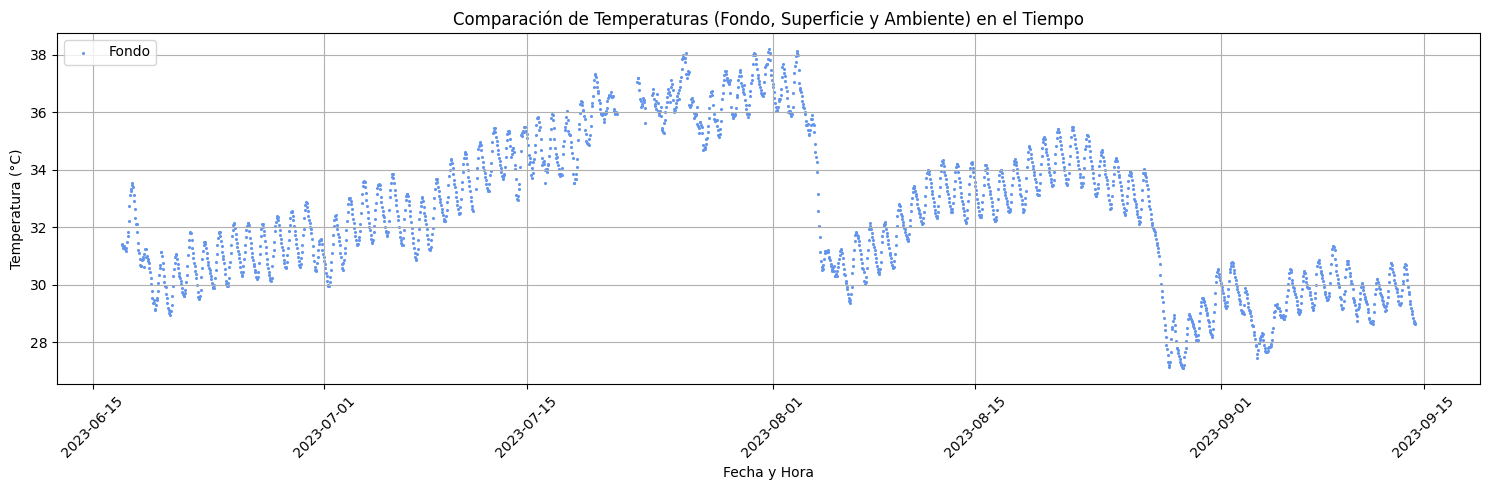

In [291]:
pintar_datos_finales(data)

# Interpolar valores faltantes

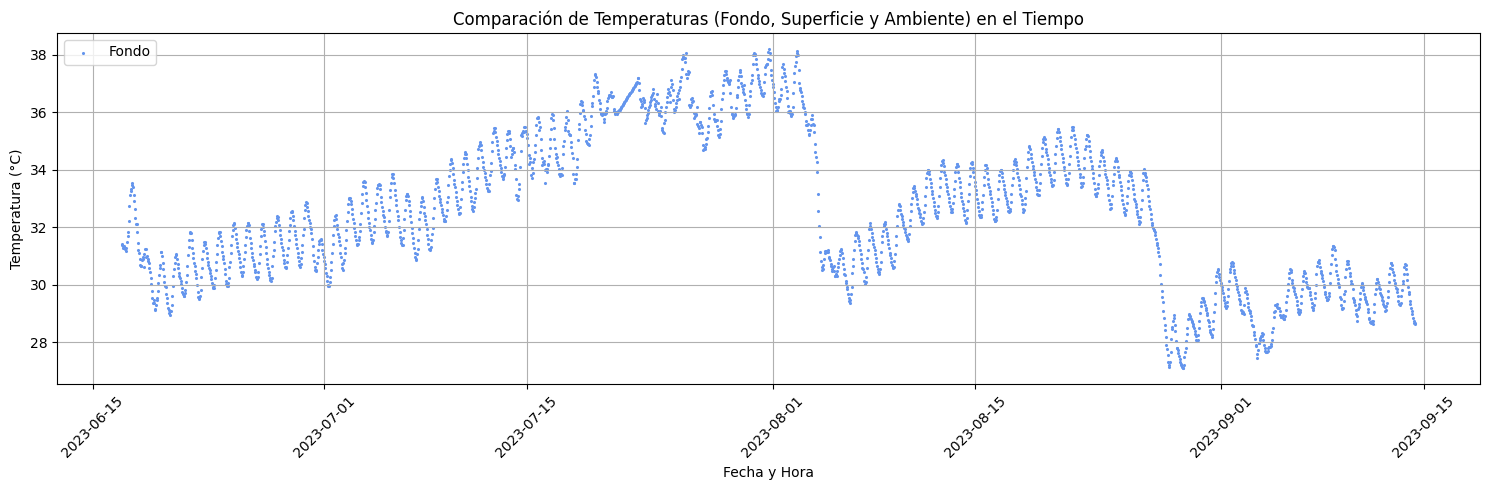

In [292]:
data_time = data.interpolate(method='time')
pintar_datos_finales(data_time)

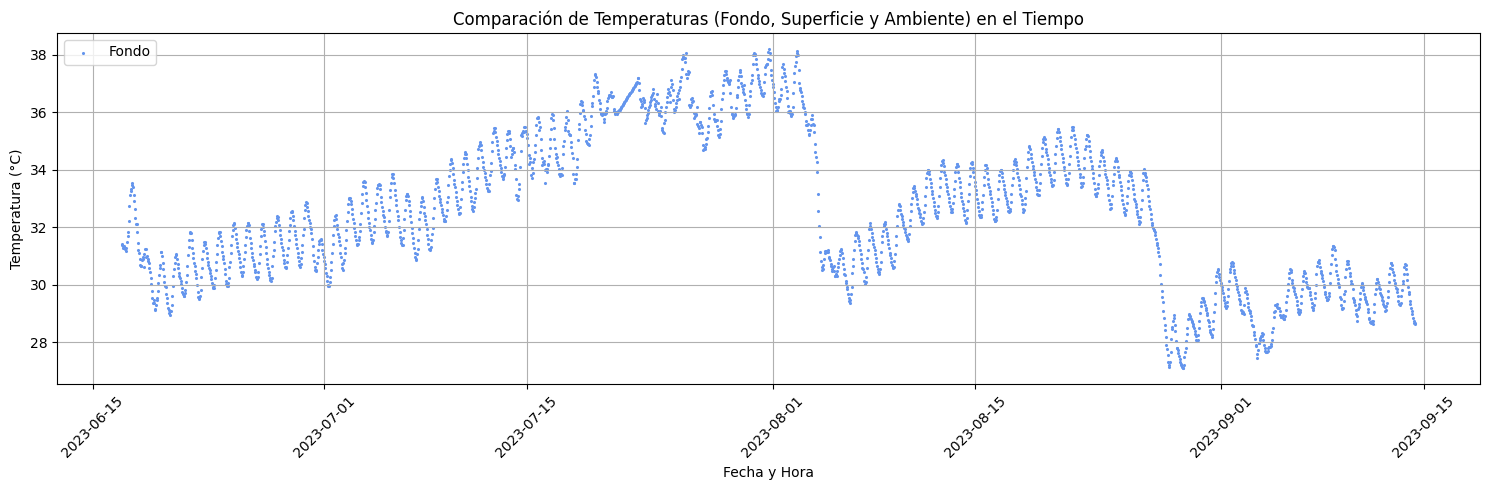

In [293]:
data_linear = data.interpolate(method='linear')
pintar_datos_finales(data_linear)

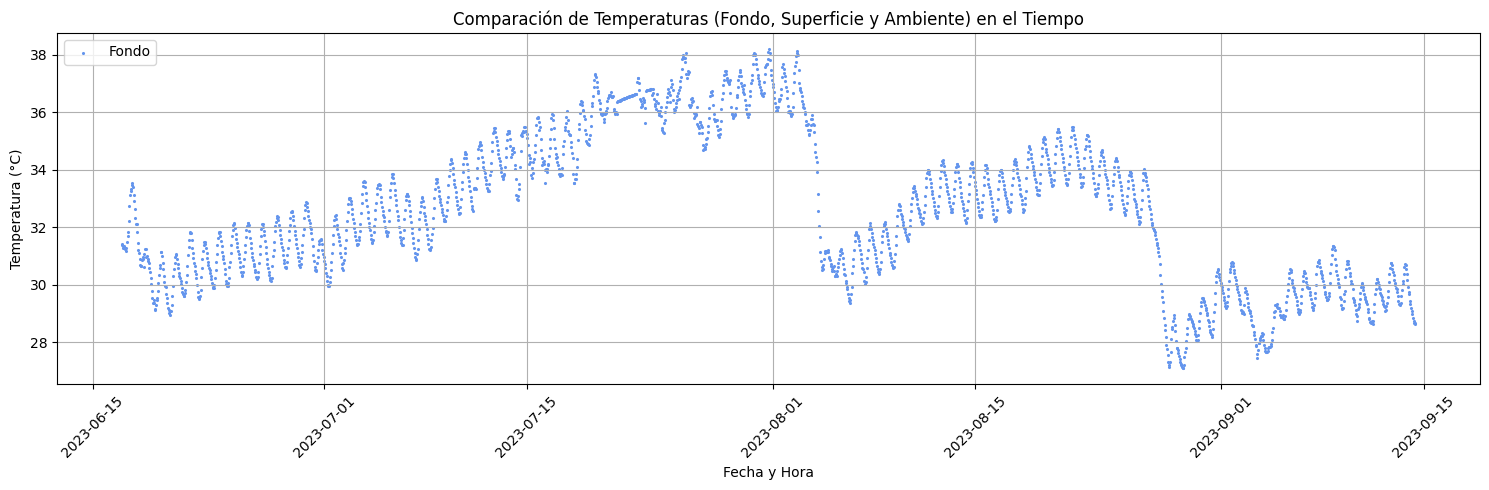

In [294]:
data_spline_interpolated = data.interpolate(method='spline', order=3)
pintar_datos_finales(data_spline_interpolated)

C:\Users\Vir\AppData\Local\Temp\ipykernel_10980\2597275488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='pad')  # rellenar hacia adelante


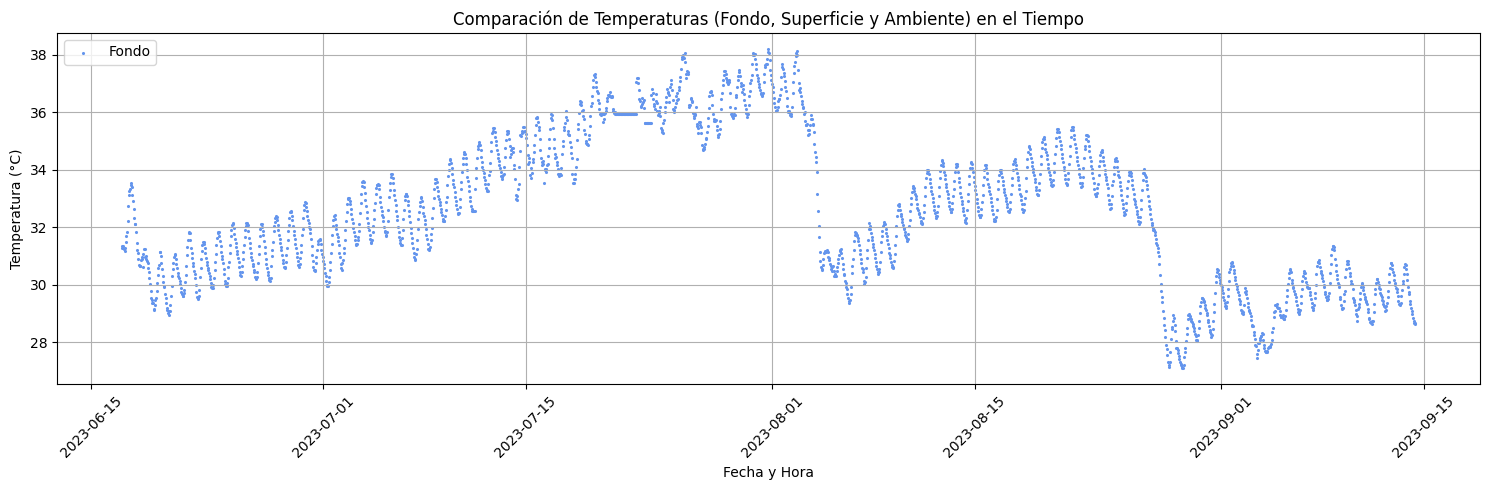

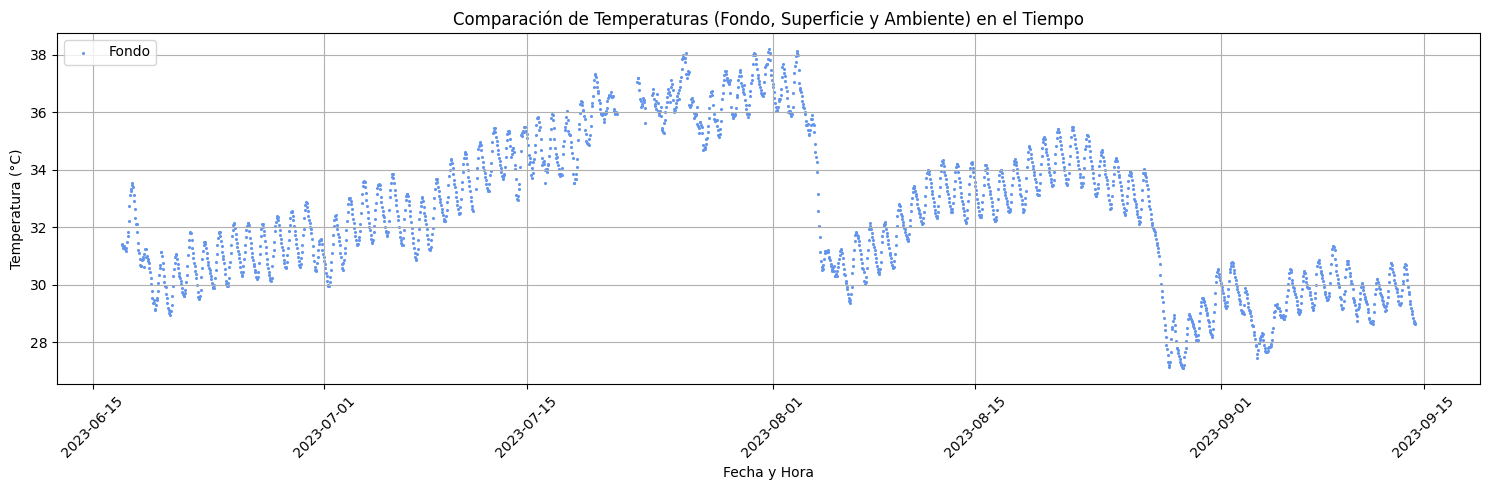

In [295]:
data_filled = data.fillna(method='pad')  # rellenar hacia adelante

# FFT
fft_values = np.fft.fft(data_filled)

# Inversión de la FFT
data_interpolated_fft = np.fft.ifft(fft_values).real  # Tomamos la parte real

# Crear un DataFrame con los datos interpolados
data_fft_interpolated = pd.DataFrame(data_interpolated_fft, index=data.index, columns=data.columns)

pintar_datos_finales(data_fft_interpolated)

pintar_datos_finales(data)

In [296]:
# from pmdarima import auto_arima

# # Ajustar auto_arima en los datos
# model_auto = auto_arima(data_filled, seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)
# print(model_auto.summary())


In [297]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Suponemos que tienes una columna específica 'col_to_forecast' que deseas interpolar
# column = 'nivel'  # Cambia esto por la columna real que deseas modelar

# # Llenar valores nulos temporalmente para la configuración del modelo
# data_filled_temp = data[column].fillna(method='pad')

# # Configurar y ajustar el modelo SARIMA
# model = SARIMAX(data_filled_temp, order=(4, 1, 1), seasonal_order=(0, 0, 2, 12))  # Los parámetros son ejemplares
# model_fit = model.fit(disp=False)

# # Predecir los valores (esto también puede usarse para imputación)
# predicted_values = model_fit.predict(start=0, end=len(data_filled_temp)-1)

# # Reemplazar los valores originales nulos con las predicciones
# interpolated_values = data[column].copy()
# interpolated_values[pd.isna(data[column])] = predicted_values[pd.isna(data[column])]

# # Resultado
# interpolated_values.head()

# data[column] = interpolated_values

# pintar_datos_finales(data)

## Manual

C:\Users\Vir\AppData\Local\Temp\ipykernel_10980\1020907104.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  manual_data['fecha'] = pd.to_datetime(manual_data['fecha'])


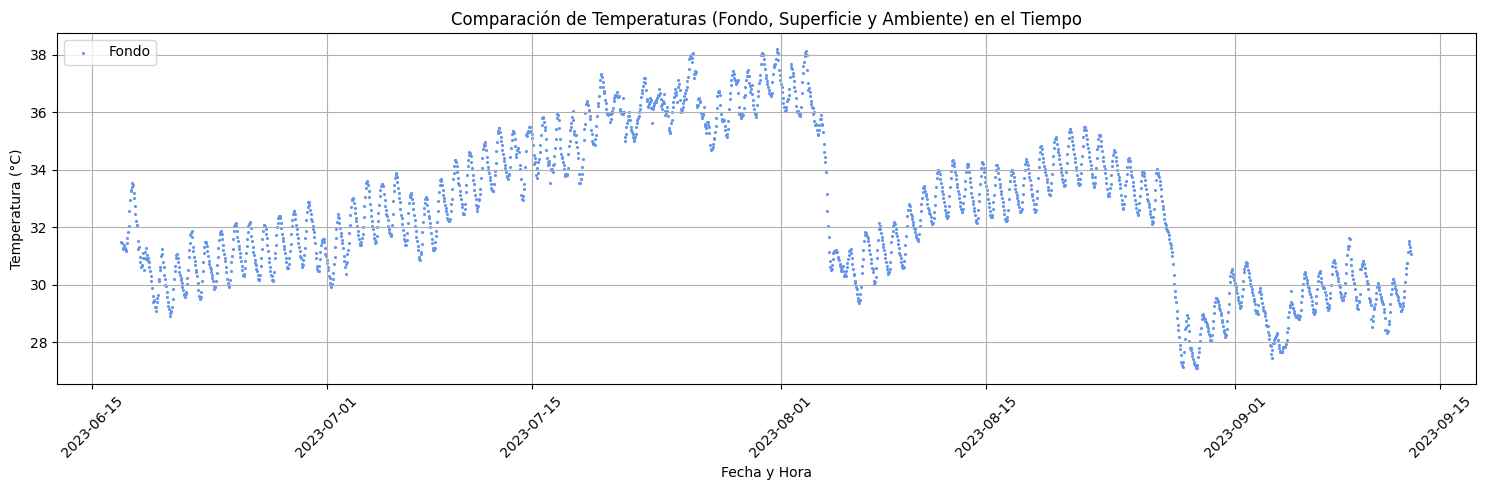

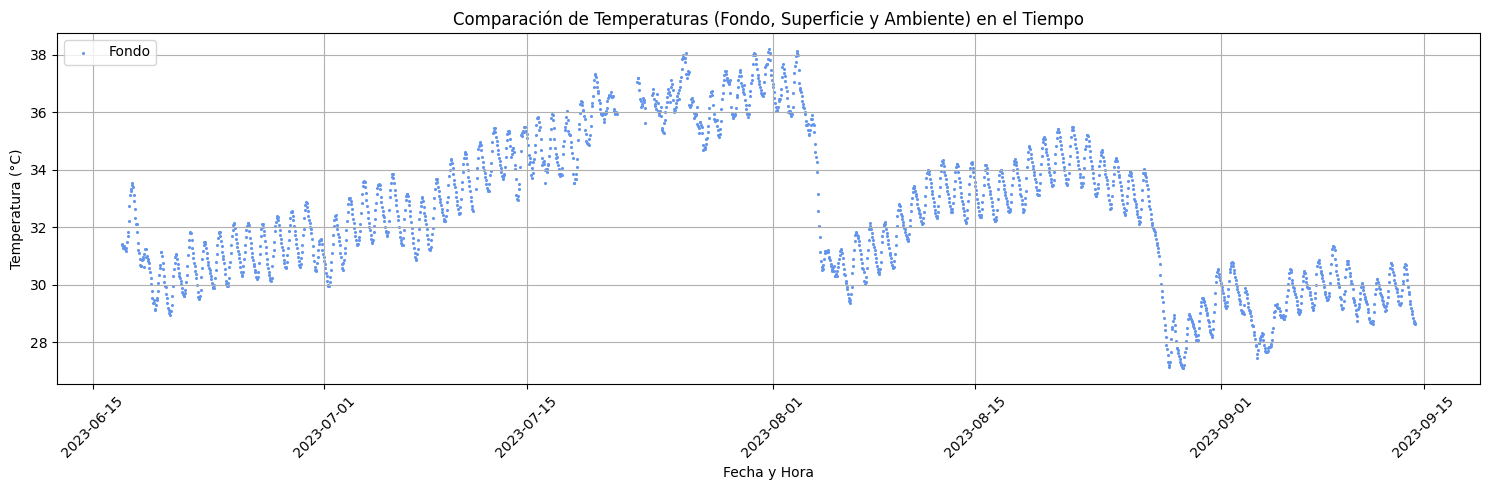

In [298]:
manual_data = pd.read_csv("./data/laguna_datos_horarios_rellenos.csv")

manual_data['fecha'] = pd.to_datetime(manual_data['fecha'])

manual_data.rename(columns={'temperatura': 'agua'}, inplace=True)
manual_data.rename(columns={'fecha': 'date'}, inplace=True) 

manual_data.set_index('date', inplace=True)

pintar_datos_finales(manual_data)
pintar_datos_finales(data)

C:\Users\Vir\AppData\Local\Temp\ipykernel_10980\1047567308.py:35: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


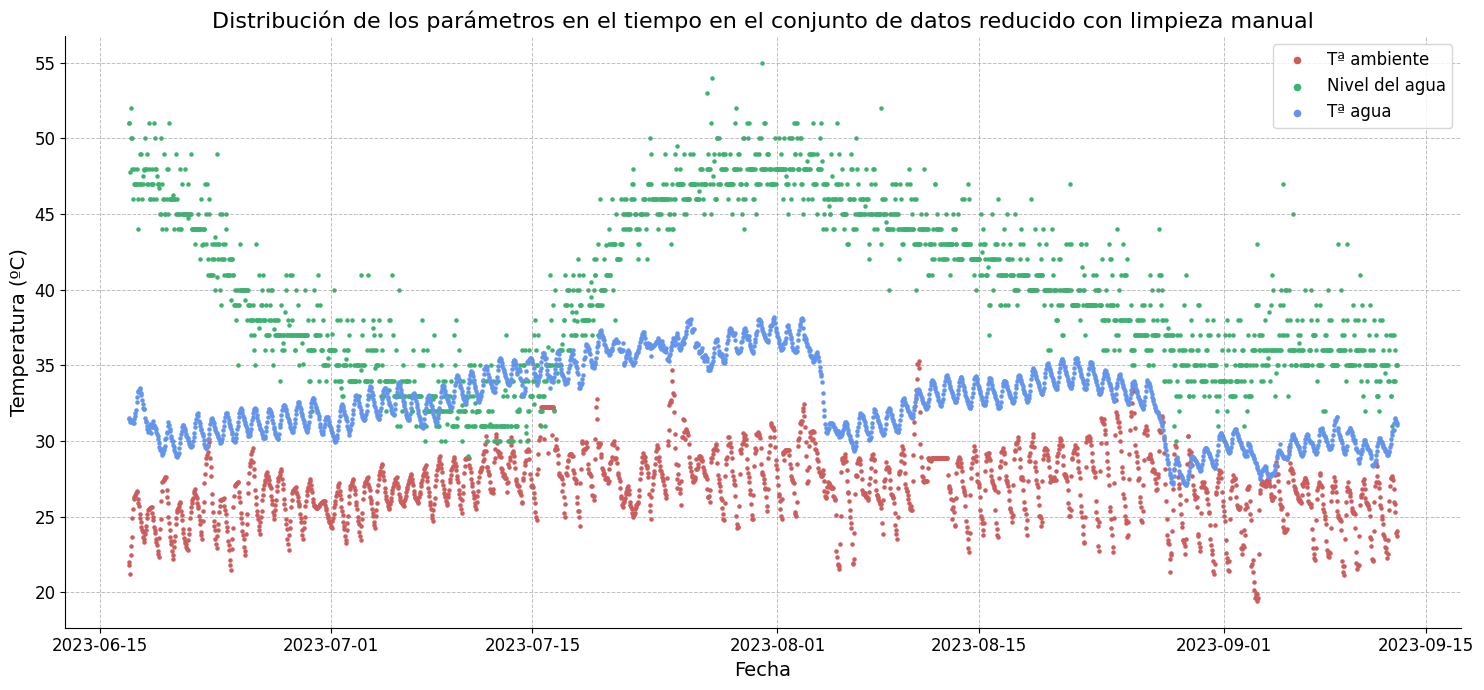

In [299]:
# # Convierte la columna 'date' a tipo datetime
# manual_data['date'] = pd.to_datetime(manual_data['date'])

# Configuración del gráfico
plt.figure(figsize=(15,7))
# Configuración de los ejes y títulos
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (ºC)', fontsize=14)
plt.title(f'Distribución de los parámetros en el tiempo en el conjunto de datos reducido con limpieza manual', fontsize=16)

# Quitar los bordes superior y derecho
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar el tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='major', labelsize=12)

# Configurar la cuadrícula
ax.grid(True, which='both', linestyle='--', linewidth=0.7, color='grey', alpha = 0.5)


# Gráfico de dispersión para 'fondo', 'superficie' y 'ambiente'
plt.scatter(manual_data.index, manual_data['ambiente'], label='Tª ambiente', marker='o', alpha=1, color = COLORES[2], s=5)
plt.scatter(manual_data.index, manual_data['nivel'], label='Nivel del agua', marker='o', alpha=1, color = COLORES[3], s=5)

plt.scatter(manual_data.index, manual_data['agua'], label='Tª agua', marker='o', alpha=1, color = COLORES[0], s=5)


# # Mostrar una leyenda en la parte superior izquierda
# plt.legend(loc='upper left')
# Ajustar el tamaño de la leyenda
plt.legend(fontsize=12)
legend = ax.legend(fontsize=12)
for handle in legend.legendHandles:
    handle._sizes = [20]  # Ajusta el tamaño de los marcadores en la leyenda





# Mostrar el gráfico
plt.tight_layout()
# Guardar el gráfico en una carpeta con buena resolución
plt.savefig(f"datos_estudio.png", dpi=300, bbox_inches='tight')
plt.show()